['MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'MQC', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'VLM', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC', 'MOC'

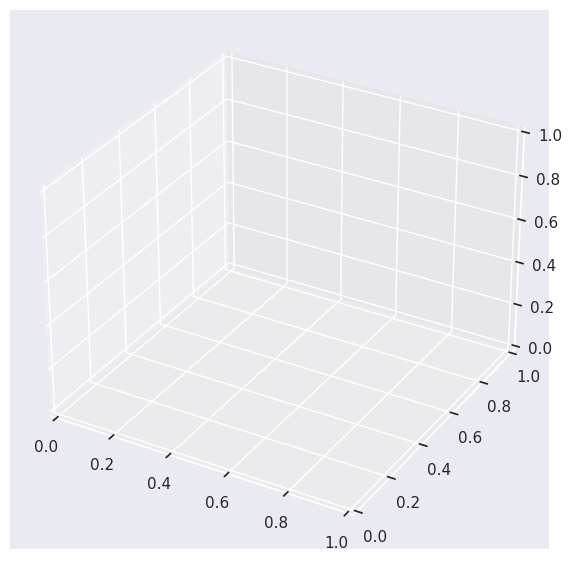

In [115]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
from logger import Logger 


template = pd.read_csv('data/template_penalty.csv')

sns.set_theme(style = 'darkgrid')

#A = pd.read_csv('data/penalty/Penalty_size_10_penalty_MQC_ansatz_CIA_stepsize_2.0_shots_1000.csv')
Config = {
    'size' : 10,
    'ansatz' : 'CIA', 
    'shots' : 1000, 
    'penalty_list' : ['MQC', 'VLM', 'MOC', 'MOMC'],
    'stepsize' : 2.0
}

Encoder = { 
    'MQC' : 0,
    'VLM' : 1, 
    'MOC' : 2, 
    'MOMC' : 3 
}
ids = range(1, 351)

source = 'data/penalty/Penalty_size_{size}_penalty_{penalty}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv'
         # data/penalty/Penalty_size_10_panalty_MQC_ansatz_CIA_stepsize_2.0_shots_1000.csv
trainset = pd.DataFrame()
data = [] 
success_trains = []
suc_penalties = [] 
suc_budgets = [] 
penalties = [] 
budgets = []

for penalty_method in Config['penalty_list']: 
    log = Logger(template, log_path = source.format(size = Config['size'], penalty = penalty_method, ansatz = Config['ansatz'], stepsize = Config['stepsize'], shots = Config['shots']))
    
    for id in ids: 
        line = log.read(id)
        data.append(line)
        #print(f'line trainstate {line['Train_state (vec)']} | train_budget {float(np.sum(np.where(line['Train_state (vec)'] > 0, 1, 0)))} | Test_budget {line['Budget (flt)']}')
        if (float(np.sum(np.where(line['Train_state (vec)'] > 0, 1, 0))) == line['Budget (flt)']) and (line['Train (flt)'] == line['Test (flt)']):
            success_trains.append(line)
            suc_penalties.append(line['Penalty (str)'])
            suc_budgets.append(line['Budget (flt)'])


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
print(suc_penalties, suc_budgets)
# success_trains = trainset[np.sum(np.where(trainset['Train_state (vec)'] > 0, 1, 0)) == trainset['Budget (int)']]
# penalties = success_trains['Penalty (str)'].astype(str)
# budgets = success_trains['Budget (flt)'].astype(float)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3.] [2.   2.75 3.5  4.25 5.   5.75 6.5  7.25 2.   2.75 3.5  4.25 5.   5.75
 6.5  7.25 2.   2.75 3.5  4.25 5.   5.75 6.5  7.25 2.   2.75 3.5  4.25
 5.   5.75 6.5  7.25]


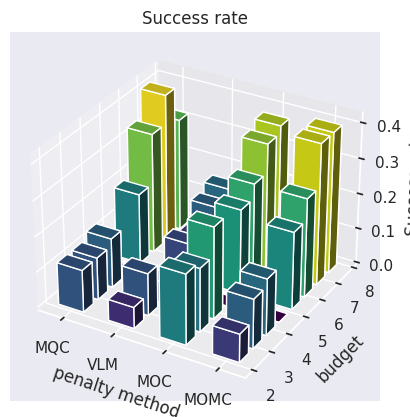

In [116]:
suc_penalties = np.array(suc_penalties)
suc_budgets = np.array(suc_budgets)

suc_penalties_encoded = np.array([Encoder[penalty] for penalty in suc_penalties])
# print(suc_penalties_encoded)
# print(suc_budgets)
# print(len(suc_penalties_encoded))
# Строим гистограмму
hist, xedges, yedges = np.histogram2d(suc_penalties_encoded, suc_budgets, bins = [4,8], range = [[0,4], [0.2 * Config['size'], 0.8 * Config['size']]])

#print(xedges, yedges, hist)
# Подготавливаем координаты
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
print(xpos, ypos)
# Размеры столбцов
dx = dy = 0.5
dz = hist.ravel() / 50

# Цветовая схема Seaborn
colors = plt.cm.viridis(dz / dz.max())

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Отрисовка
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, zsort='average')

# Настройки оформления
ax.set_xticks([0.25,1.25,2.25,3.25])
ax.set_xticklabels(Config['penalty_list'])
ax.set_xlabel('penalty method')
ax.set_ylabel('budget')
ax.set_zlabel('Success rate')
plt.title("Success rate")

plt.show()

[0. 1. 2. 3. 4.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
xpos [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 1.25 1.25 1.25 1.25
 1.25 1.25 1.25 1.25 1.25 1.25 2.25 2.25 2.25 2.25 2.25 2.25 2.25 2.25
 2.25 2.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25] ,
 ypos [0.25 1.25 2.25 3.25 4.25 5.25 6.25 7.25 8.25 9.25 0.25 1.25 2.25 3.25
 4.25 5.25 6.25 7.25 8.25 9.25 0.25 1.25 2.25 3.25 4.25 5.25 6.25 7.25
 8.25 9.25 0.25 1.25 2.25 3.25 4.25 5.25 6.25 7.25 8.25 9.25] ,
 zpos 0,
 dx 0.5, 
 dy 0.5, 
 dz [ 8.  2.  5.  6.  0.  0.  0.  0.  0.  0.  9.  7. 11.  6.  0.  0.  0.  0.
  0.  0.  3.  8.  8.  3.  0.  0.  0.  0.  0.  0.  5.  9.  4.  6.  0.  0.
  0.  0.  0.  0.]


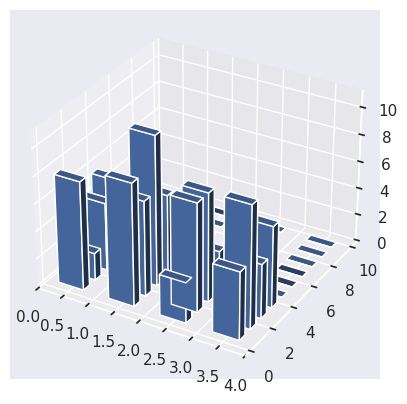

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
# np.random.seed(19680801)



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4

hist, xedges, yedges = np.histogram2d(x, y, bins = [4,10], range=[[0, 4], [0, 10]])

# Construct arrays for the anchor positions of the 16 bars.
print(xedges)
print(yedges)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

print(f'xpos {xpos} ,\n ypos {ypos} ,\n zpos {zpos},\n dx {dx}, \n dy {dy}, \n dz {dz}')

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()


In [55]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
from logger import Logger 


template = pd.read_csv('data/template_penalty.csv')

sns.set_theme(style = 'darkgrid')

#A = pd.read_csv('data/penalty/Penalty_size_10_penalty_MQC_ansatz_CIA_stepsize_2.0_shots_1000.csv')
Config = {
    'size' : 10,
    'ansatz' : 'CIA', 
    'shots' : 1000, 
    'penalty_list' : ['MQC', 'VLM', 'MOC', 'MOMC'],
    'stepsize' : 2.0, 
    'budgets' : [2, 3, 4, 5, 6, 7, 8]
}

Encoder = { 
    'MQC' : 0,
    'VLM' : 1, 
    'MOC' : 2, 
    'MOMC' : 3 
}

ids = range(1, 351)

source = 'data/penalty/Penalty_size_{size}_penalty_{penalty}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv'
         # data/penalty/Penalty_size_10_panalty_MQC_ansatz_CIA_stepsize_2.0_shots_1000.csv
trainset = pd.DataFrame()

for penalty in Config['penalty_list']: 
    trainset = pd.concat([trainset, pd.read_csv(source.format(size = Config['size'], penalty = penalty, ansatz = Config['ansatz'], stepsize = Config['stepsize'], shots = Config['shots']))])

success_rates = np.zeros(shape = (len(Config['penalty_list']), len(Config['budgets'])))
average_iterations = np.zeros(shape = (len(Config['penalty_list']), len(Config['budgets'])))
approximations = np.zeros(shape = (len(Config['penalty_list']), len(Config['budgets'])))

for penalty_method in Config['penalty_list']: 
    log = Logger(template, log_path = source.format(size = Config['size'], penalty = penalty_method, ansatz = Config['ansatz'], stepsize = Config['stepsize'], shots = Config['shots']))
    
    for id in ids: 
        line = log.read(id)

        general_count = len(trainset[(trainset['Penalty (str)'] == penalty_method) & (trainset['Budget (flt)'] == line['Budget (flt)'])])
        #print(f'line trainstate {line['Train_state (vec)']} | train_budget {float(np.sum(np.where(line['Train_state (vec)'] > 0, 1, 0)))} | Test_budget {line['Budget (flt)']}')
        if (float(np.sum(np.where(line['Train_state (vec)'] > 0, 1, 0))) == line['Budget (flt)']) and (line['Train (flt)'] == line['Test (flt)']):
            success_rates[Encoder[line['Penalty (str)']], Config['budgets'].index(line['Budget (flt)'])] += 1 / general_count
            average_iterations[Encoder[line['Penalty (str)']], Config['budgets'].index(line['Budget (flt)'])] += line['Train_iterations (int)'] / general_count
        #print(f'{Encoder[line['Penalty (str)']] }, {line['Budget (flt)']}')
        approximations[Encoder[line['Penalty (str)']], Config['budgets'].index(line['Budget (flt)'])] += (np.abs((line['Train (flt)'] - line['Test (flt)']) / line['Test (flt)'])) / general_count



xpos : [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5]
ypos : [2 3 4 5 6 7 8 2 3 4 5 6 7 8 2 3 4 5 6 7 8 2 3 4 5 6 7 8]


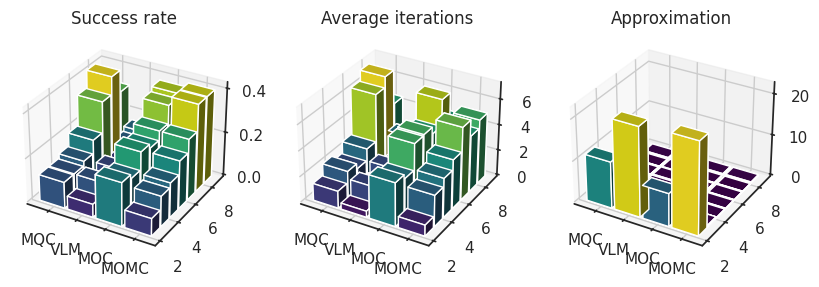

In [82]:
fig = plt.figure(figsize=(10, 7))

sns.set_style('white')


suc_ax = fig.add_subplot(131, projection='3d')
iter_ax = fig.add_subplot(132, projection='3d')
approx_ax = fig.add_subplot(133, projection='3d')

# success_trains = trainset[np.sum(np.where(trainset['Train_state (vec)'] > 0, 1, 0)) == trainset['Budget (int)']]
# penalties = success_trains['Penalty (str)'].astype(str)
# budgets = success_trains['Budget (flt)'].astype(float)



xpos, ypos = np.meshgrid(np.array([0,1,2,3]) - 0.5, Config['budgets'], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
print (f'xpos : {xpos}')
print (f'ypos : {ypos}')

# xpos = range(len(Config['penalty_list']))
# ypos = Config['budgets']
zpos = 0
dx = dy = 0.9

dz = success_rates.ravel()
colors = plt.cm.viridis(dz / dz.max())
suc_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors, zsort='average')
suc_ax.set_xticks([0,1,2,3])
suc_ax.set_xticklabels(Config['penalty_list'])
suc_ax.set_title('Success rate')

dz = average_iterations.ravel()
colors = plt.cm.viridis(dz / dz.max())
iter_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors, zsort='average')
iter_ax.set_xticks([0,1,2,3])
iter_ax.set_xticklabels(Config['penalty_list'])
iter_ax.set_title('Average iterations')

dz = approximations.ravel()
colors = plt.cm.viridis(dz / dz.max())
approx_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors, zsort = 'average')
approx_ax.set_xticks([0,1,2,3])
approx_ax.set_xticklabels(Config['penalty_list'])
approx_ax.set_title('Approximation')

plt.show()